<a href="https://colab.research.google.com/github/astroviki/NumericalMethods/blob/main/solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install jupyter-dash
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u

import scipy.optimize as opt


     |████████████████████████████████| 1.1 MB 5.1 MB/s 
     |████████████████████████████████| 3.7 MB 33.3 MB/s 
     |████████████████████████████████| 83 kB 2.4 MB/s 
     |████████████████████████████████| 1.8 MB 56.4 MB/s 
     |████████████████████████████████| 357 kB 48.1 MB/s 
  Created wheel for dash: filename=dash-1.21.0-py3-none-any.whl size=1100489 sha256=c18c15e8c6bd7f42efff8729418213baf212a42025cb312350a2cae8a0dadb8a
  Stored in directory: /root/.cache/pip/wheels/59/a4/f1/a7140afcad8dbaa3b1b12ef80843d29403d6ecca1c2f397948
  Created wheel for dash-core-components: filename=dash_core_components-1.17.1-py3-none-any.whl size=3738995 sha256=d8fd937d11ad3517c26f4825b3f5b1fafe0b4d093d6b447a7588a12a24cd3fe3
  Stored in directory: /root/.cache/pip/wheels/ca/5b/fb/a135a7bf8e21223e4104aa5526a5173a20b64fe7fcd055b999
  Created wheel for dash-html-components: filename=dash_html_components-1.1.4-py3-none-any.whl size=319771 sha256=e041bf5913a9823d03f618714194dcbfcbfbb041ba64b2a60a4424e

### Resctricted three body problem



In [3]:
t_unit = (12.0*u.year.cgs).cgs.value
mass_unit = const.M_sun.cgs.value
length_unit = 5.2*const.au.cgs.value
M1 = 1.0
M2 = 0.5

# Distance between planets in [AU]
distance = 5.2 # AU

nu = 0.1

x1 = -0.5
x2 = x1+1
y1 = 0.0
y2 = 0.0


# Angular speed
Omega = 1.5
G = const.G.cgs


$$ 
U = - \frac{GM_{s}}{r_s} - \frac{GM_p}{r_p} - \frac{1}{2}m(r\omega)^2
$$
kde $M_s,r_s$ je hmotnost Slunce a vzdálenost satelitu od Slunce, obdobně $M_p,r_p$  je hmotnost planety a vzdálenost satelitu do planety. Poslední člen celkového potenciálu $u$, ve kterém $r$ značí vzdálenost satelitu od hmotného středu soustavy a $\omega$ vyjadřuje rotační potenciál v důsledku neinerciálí vztažné soustavy. 
$$
U = -\frac{GMm(1-\mu)}{r_s}-\frac{GMm\mu}{r_p}-\frac{GMm}{2R^3}r^2
$$
kde $M = m_s+m_p$ a $\mu = m_p/M$. Výslednou rovnici můžeme ještě dále upravit
$$
U = \frac{GMm}{R}\left(-\frac{1-\mu}{\xi R}-\frac{\mu}{\eta R}-\frac{1}{2}\frac{(\rho R)^2}{R^3}\right)
$$

In [60]:

def potential(x):
  ksi = x[0]
  eta = x[1]
  u = -(1-nu)/(np.sqrt((ksi+nu)**2+eta**2))\
      -nu/(np.sqrt((ksi-(1-nu))**2+eta**2))\
      -0.5*(ksi**2+eta**2)
  return u

  

In [61]:
N = 100
x = np.linspace(-1.5,1.5,N)
y = np.linspace(-1.5,1.5,N)

X,Y = np.meshgrid(x,y)

Z = potential(np.array([X,Y]))

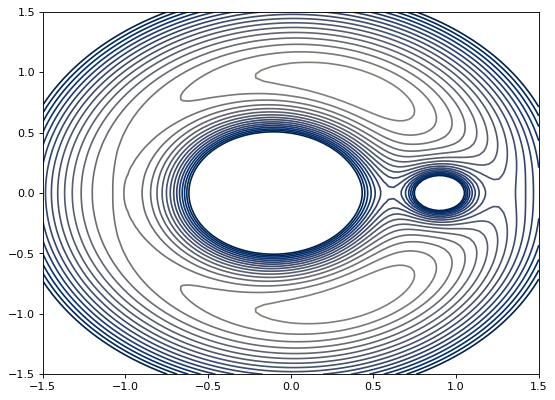

In [6]:
levels=np.linspace(-2.0,-1.0,30)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax1 = plt.contour(X, Y, Z,levels,cmap='cividis')

# Lagrange points

plt.show()


In [52]:
import os
import numpy.ma as ma
os.environ['HV_DOC_HTML'] = 'true'
import holoviews as hv
from holoviews import opts

import bokeh.io
bokeh.io.output_notebook()
hv.extension('plotly')
#hv.extension('bokeh')

# Make data.

Zm = ma.masked_less(Z, -2.8)
surface = hv.Surface(Zm, bounds=(-1.5, -1.5, 1.5, 1.5))
surface.opts(colorbar=False, width=500, height=500)

#img = hv.Image(Zm)

#hv.operation.contours(img, levels=100, overlaid=True).opts(
#    hv.opts.Contours(
#        cmap=["white"],
#        frame_height=500,
#        frame_width=500,
#        line_width=2,
#        show_legend=False,
#    )
#).opts(
#    padding=0
#)

#layout = img + surface
#layout.opts(shared_axes=True)

#hv.Curve([1, 2, 3])

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:Surface   [x,y]   (z)

In [14]:
!pip install chart-studio
import chart_studio.plotly as py
# Data to be plotted
x = np.outer(np.linspace(-2, 2, 30), np.ones(30)) 
y = x.copy().T 
z = np.cos(x ** 2 + y ** 2) 
  
# plotting the figure
fig = go.Figure(data=[go.Surface(x=x, y=y, z=z)]) 
  


AttributeError: ignored

1.3203048706054688


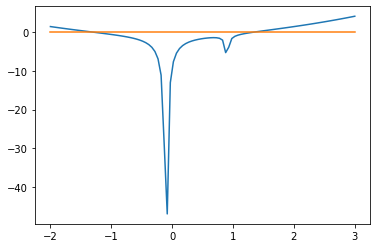

In [29]:
nu = 0.1
def L1L2L3(x):
  value = -(1-nu)/(np.sqrt((x+nu)**2))\
           -nu/(np.sqrt((x-(1-nu))**2))\
           +0.5*(x**2)

  return value


def LagrangePointsL4L5(x):
  ksi = x[0]
  eta = x[1]
  value = -(1-nu)/(np.sqrt((ksi+nu)**2+eta**2))\
           -nu/(np.sqrt((ksi-(1-nu))**2+eta**2))\
           -0.5*(ksi**2+eta**2)
  return -value

a = 0.5
b = 1.5

#print(L1L2L3(a))
#print(L1L2L3(b))

ksi = opt.bisect(L1L2L3,a,b,xtol=1e-5)
print(ksi)
x = np.linspace(-2,3,100)
y0 = np.zeros(100)
plt.plot(x,L1L2L3(x))
plt.plot(x,y0)

In [72]:
import plotly.graph_objects as go


Zm = ma.masked_less(Z, -2.8)
Z[np.where(Z < -2.8)] = np.nan
#fig = go.Figure(data =
#     go.Contour(x = x, y = y, z = Zm))

fig = go.Figure(go.Surface(
    contours = {
        "x": {"show": True, "start": -1.5, "end": 1.5, "size": 0.1, "color":"black"},
        "y": {"show": True, "start": --.5, "end": 1.5, "size": 0.1, "color":"black"},
    },
    x = x,
    y = y,
    z = Z
    ))
 
fig.show()

In [70]:
import numpy.ma as ma

Zm = ma.masked_less(Z,-2.8)
print(Zm)

[[-2.7239664236126 -2.6837329368385063 -2.6444583572148113 ...
  -2.64239132061276 -2.6818520667205936 -2.722263123387815]
 [-2.6839357045422934 -2.6438555393608416 -2.604738775367621 ...
  -2.6026761443178916 -2.6419895595938767 -2.6822567305158302]
 [-2.6448791015148334 -2.6049574093916323 -2.5660039445281853 ...
  -2.563955484630432 -2.6031163894905722 -2.643234727815388]
 ...
 [-2.6448791015148334 -2.6049574093916323 -2.5660039445281853 ...
  -2.563955484630432 -2.6031163894905722 -2.643234727815388]
 [-2.6839357045422934 -2.6438555393608416 -2.604738775367621 ...
  -2.6026761443178916 -2.6419895595938767 -2.6822567305158302]
 [-2.7239664236126 -2.6837329368385063 -2.6444583572148113 ...
  -2.64239132061276 -2.6818520667205936 -2.722263123387815]]
